# Додаткове завдання з pandas
Вітаю! В цьому завданні будемо працювати з даними з опитування щодо зарплат ІТ спеціалістів на рексурсі DOU від грудня 2022 року. Впевнена, це буде цікаве дослідження, а заразом і практика pandas :)
Цей аналіз може бути корисним людині, яка обирає напрям роботи в ІТ і хоче зрозуміти тенденції. За якісного виконання цього аналізу, цей проєкт можна сміливо додавати у Ваше портфоліо!

1. Зчитайте дані з файлу `2022_dec_raw.csv`. Увага! Тут необхідно використати аргумент `pd.read_csv` `sep=';'`, бо розділювач в даних - крапка з комою.

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_csv('../data/2022_dec_raw.csv', sep=';')
df.head(5)

,Timestamp,Ви працюєте зараз в ІТ?,Де ви зараз живете?,В якій області ви зараз живете?,"Зарплата у $$$ за місяць, лише ставка після сплати податків",Ваша стать,Ваш вік,Яка у вас освіта?,Чи є у вас науковий ступінь?,Знання англійської мови,...,Ваша посада4,Ваша посада5,Ваша посада6,Ваша посада7,Чи використовуєте ви у своїй роботі мови програмування (одну чи декілька)?,Основна мова програмування,Вкажіть вашу основну спеціалізацію,В якій сфері працюєте?,Тип компанії,Загальний стаж роботи за спеціальністю
0,11.30.2022 10:26:37,"Так, працюю part-time",В Україні,Івано-Франківськ чи область,4000,Чоловік,29,"Вища (бакалавр, спеціаліст, магістр)",Немає,Intermediate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Blockchain,Стартап,8 років
1,11.30.2022 10:26:39,"Так, працюю full-time","За кордоном (переїхали через війну, але планую...",NaN,NaN,Чоловік,36,"Вища (бакалавр, спеціаліст, магістр)",Немає,Advanced,...,NaN,NaN,NaN,NaN,NaN,Ruby,Full Stack розробка,Public services / Government,Продуктова,3 роки
2,11.30.2022 10:26:58,"Так, працюю full-time",В Україні,Київ чи область,2500,Чоловік,34,"Вища (бакалавр, спеціаліст, магістр)",Немає,Elementary,...,NaN,NaN,NaN,NaN,NaN,C# / .NET,Full Stack розробка,"Adtech / Advertising, Security, Telecom",Продуктова,4 роки
3,11.30.2022 10:27:31,"Так, працюю full-time",В Україні,Львів чи область,500,Жінка,23,"Вища (бакалавр, спеціаліст, магістр)",Немає,Pre-Intermediate,...,NaN,NaN,NaN,NaN,"Ні, не використовую",NaN,NaN,Telecom,Продуктова,Пів року
4,11.30.2022 10:27:34,"Ні, тимчасово не працюю",В Україні,Житомир чи область,2800,Жінка,33,"Вища (бакалавр, спеціаліст, магістр)",Немає,Upper-Intermediate,...,NaN,NaN,NaN,NaN,"Ні, не використовую",NaN,NaN,Automotive,Продуктова,6 років


2. Які колонки мають дані?

In [3]:
df.columns.tolist()

['Timestamp',
 'Ви працюєте зараз в ІТ?',
 'Де ви зараз живете? ',
 'В якій області ви зараз живете?',
 'Зарплата у $$$ за місяць, лише ставка після сплати податків',
 'Ваша стать',
 'Ваш вік',
 'Яка у вас освіта?',
 'Чи є у вас науковий ступінь? ',
 'Знання англійської мови',
 'Оберіть вашу посаду',
 'Ваш тайтл',
 'Ваша спеціалізація',
 'Вкажіть вашу спеціалізацію',
 'Оберіть вашу спеціалізацію',
 'Ваша посада',
 'Оберіть вашу посаду2',
 'Ваша посада3',
 'Ваша посада4',
 'Ваша посада5',
 'Ваша посада6',
 'Ваша посада7',
 'Чи використовуєте ви у своїй роботі мови програмування (одну чи декілька)?',
 'Основна мова програмування',
 'Вкажіть вашу основну спеціалізацію',
 'В якій сфері працюєте?',
 'Тип компанії',
 'Загальний стаж роботи за спеціальністю']

3. Скільки рядків та колонок мають дані? Скільки пропущених значень має кожна з колонок?

In [4]:
print(f'Rows: {df.shape[0]}\nColumns: {df.shape[1]}')

Rows: 13315
Columns: 28


In [5]:
df.isnull().sum()

Timestamp                                                                         0
Ви працюєте зараз в ІТ?                                                           0
Де ви зараз живете?                                                               0
В якій області ви зараз живете?                                                1777
Зарплата у $$$ за місяць, лише ставка після сплати податків                      27
Ваша стать                                                                        0
Ваш вік                                                                           0
Яка у вас освіта?                                                                 0
Чи є у вас науковий ступінь?                                                    111
Знання англійської мови                                                           0
Оберіть вашу посаду                                                               0
Ваш тайтл                                                                   

4. Які колонки мають всі значення заповненими (не мають дожного None значення)? Виведіть програмно список цих колонок.

In [6]:
df.columns[df.isnull().sum() == 0].tolist()

['Timestamp',
 'Ви працюєте зараз в ІТ?',
 'Де ви зараз живете? ',
 'Ваша стать',
 'Ваш вік',
 'Яка у вас освіта?',
 'Знання англійської мови',
 'Оберіть вашу посаду',
 'Ваш тайтл',
 'В якій сфері працюєте?',
 'Тип компанії',
 'Загальний стаж роботи за спеціальністю']

5. Який тип мають колонки в наборі даних? Які з колонок типу object логічно на ваш погляд перетворити на числові колонки?

In [7]:
df.dtypes

Timestamp                                                                     object
Ви працюєте зараз в ІТ?                                                       object
Де ви зараз живете?                                                           object
В якій області ви зараз живете?                                               object
Зарплата у $$$ за місяць, лише ставка після сплати податків                   object
Ваша стать                                                                    object
Ваш вік                                                                       object
Яка у вас освіта?                                                             object
Чи є у вас науковий ступінь?                                                  object
Знання англійської мови                                                       object
Оберіть вашу посаду                                                           object
Ваш тайтл                                                        

In [8]:
type(df.iloc[0]['Зарплата у $$$ за місяць, лише ставка після сплати податків'])

str

6. Трансформуйте колонки 'Ваш вік', 'Зарплата у $$$ за місяць, лише ставка після сплати податків' у тип даних float. УВАГА! Перед трансформацією подивіться, які дані містять ці колонки. Аби успішно трансформувати тип даних, треба спочатку привести рядки до того виду, який буде підходити, аби потім рядок зробити типом float.

In [9]:
df['Ваш вік'] = df['Ваш вік'].str.replace(',', '.').astype(float)

In [10]:
df['Зарплата у $$$ за місяць, лише ставка після сплати податків'] = df['Зарплата у $$$ за місяць, лише ставка після сплати податків'].str.replace(',', '.').astype(float)

7. Це завдання з зірочкою! Нам треба транфсформувати колонку Timestamp у тип даних `datetime64[ns]`. Це не так просто як здається на першйий погляд :) Але це реальна ситуація, яка може трапитись при зборі даних в роботі аналітиком.
Я запропоную один зі способів виконати завдання, але ви можете написати по-своєму. Головне - отримати колонку - потрібного типу.
Пропоную наступний алгоритм дій:
    1. Подивитись, які дані містяться в цій колонці. Виведіть перші і останні 5 записів. Чи однаковий формат цих даних? (спойлер: ні, бо інакше все було б просто :))
    2. Нам треба враховуючи різний формат даних перетворити рядок у колонці `Timestamp` на тип `datetime64[ns]`. Як це зробити? Для перетворення рядка на `datetime64` пропоную скористатись `datetime.datetime.strptime`.
    Для цього треба імпортувати бібліотеку `datetime`. Я пропоную написати функцію для обробки кожного окремого рядка, яка враховує довжину рядка і на основі цього застосовує різний формат даних дати.
    Як прописувати формат даних можна переглянути [тут](https://www.w3schools.com/python/python_datetime.asp).
    3. Коли функція для обробки кожного окремого рядка готова, застосуйте її для всіх даних з допомогою методу `apply`.

In [12]:
df.Timestamp.head(5)

0    11.30.2022 10:26:37
1    11.30.2022 10:26:39
2    11.30.2022 10:26:58
3    11.30.2022 10:27:31
4    11.30.2022 10:27:34
Name: Timestamp, dtype: object

In [13]:
df.Timestamp.tail(5)

13310    01.09.2023 11:01
13311    01.09.2023 11:14
13312    01.09.2023 11:19
13313    01.09.2023 11:28
13314    01.09.2023 11:38
Name: Timestamp, dtype: object

In [14]:
len(df.Timestamp.iloc[0]), len(df.Timestamp.iloc[-1])

(19, 16)

In [18]:
def str_to_daytime(time_str):
    if len(time_str) > 16:
        return datetime.strptime(time_str, '%m.%d.%Y %H:%M:%S')
    elif len(time_str) <= 16:
        return datetime.strptime(time_str, '%m.%d.%Y %H:%M')
    else:
        raise ValueError(f'Unknown date format: {time_str}')

In [19]:
df['Timestamp'] = df['Timestamp'].astype(str).apply(str_to_daytime)

8. Для колонок типу даних object (які такими лишились після всіх наших трансформацій) виведіть кількість унікальних значень.

In [20]:
df.select_dtypes('object').nunique()

Ви працюєте зараз в ІТ?                                                          5
Де ви зараз живете?                                                              2
В якій області ви зараз живете?                                                 23
Ваша стать                                                                       2
Яка у вас освіта?                                                                5
Чи є у вас науковий ступінь?                                                     3
Знання англійської мови                                                          5
Оберіть вашу посаду                                                             22
Ваш тайтл                                                                       10
Ваша спеціалізація                                                               8
Вкажіть вашу спеціалізацію                                                       4
Оберіть вашу спеціалізацію                                                      21
Ваша

9. Для колонок типу даних object виведіть топ 10 найбільш частих значень з кількістю рядків, в яких це значення зустрічається. Зробіть це для кожної колонки окремо. Наприклад, в циклі.  
Що цікавого бачите? Які висновки можна зробити? Що особисто Вас вразило?

In [59]:
for column in df:
    print(df[column].value_counts().sort_values(ascending=False).head(10))
    print()

Timestamp
2022-12-07 12:54:00    29
2022-12-07 12:56:00    28
2022-12-07 12:57:00    25
2022-12-07 12:55:00    25
2022-12-07 12:58:00    24
2022-12-07 12:59:00    23
2022-12-07 13:01:00    19
2022-12-07 13:07:00    15
2022-12-07 13:00:00    15
2022-12-07 13:03:00    14
Name: count, dtype: int64

Ви працюєте зараз в ІТ?
Так, працюю full-time      12643
Ні, тимчасово не працюю      380
Так, працюю part-time        152
Так, я фрилансер             115
Інше                          25
Name: count, dtype: int64

Де ви зараз живете? 
В Україні                                                      11587
За кордоном (переїхали через війну, але планую повернутися)     1728
Name: count, dtype: int64

В якій області ви зараз живете?
Київ чи область                4411
Львів чи область               2353
Дніпро чи область               751
Івано-Франківськ чи область     478
Вінниця чи область              447
Одеса чи область                443
Харків чи область               355
Полтава чи област

Мої інсайти:

1. Час заповнення опитувальника))) наче всю обідню перерву з 12 заповнюали і в середньому за годину як раз впоралися.
2. Жінок АЖ втричі менше 😢
3. Як записались дані про мову програмування: Так, використовую   -   2120 (тут я і здивувалась)
   в наступній колонці тільки з топ10 мов сума буде 6700 людей. а ще є колонка з професіями там в топі деви(6700) і QA інженери(вони ж автоматиовують тестування, тож володіють мовою програмування) яких сумарно 9000.
4. Після 15 років стажу ти вже такий виснажений що заплата знову зменшується?😂 Цікаво це дослідити на більш старих IT ринках інших країн.
   (можна наймати двох старих айтівців за ціною одного з 10тирічним досвідом))))))

10. Виведіть медіанну (медіана - це значення, менше якого є рівно 50% вибірки і більше якого є теж рівно 50% вибірки)
ЗП (Зарплата у $$$) для кожного рівня знання англійської. Які висновки можна зробити?

In [22]:
df.groupby('Знання англійської мови')['Зарплата у $$$ за місяць, лише ставка після сплати податків'].median().sort_values()

Знання англійської мови
Elementary            1155.0
Pre-Intermediate      1404.0
Intermediate          2125.0
Upper-Intermediate    3300.0
Advanced              3500.0
Name: Зарплата у $$$ за місяць, лише ставка після сплати податків, dtype: float64

11. Є така штука як сортування значень категоріальної змінної. Нам це зараз стане в нагоді, адже рівні англійської можна посортувати.
Давайте відсотруємо рівні англ. і тайтли. Просто запустіть код нижче і проаналізуйте, що він робить.

In [23]:
df['Знання англійської мови'] = pd.Categorical(df['Знання англійської мови'],
                      categories=['Elementary','Pre-Intermediate','Intermediate','Upper-Intermediate','Advanced'],
                      ordered=True)

df['Ваш тайтл'] = pd.Categorical(df['Ваш тайтл'],
                      categories=['Intern/Trainee', 'Junior', 'Немає тайтлу', 'Middle', 'Senior', 'Tech Lead', 'Team Lead', 'Architect', 'Head', 'Manager'],
                      ordered=True)

Клас! я, чесно, не зрозуміла для чого нам це, але чатGPT мені любʼязно розповів і це просто вау)))
за категоріальними впорядкованими колонками можна фільтрувати, сортувати, їх можна порівнювати👍🏻 

12. Зробіть зводну таблицю, де стовпці - це 'Ваш тайтл', рядки - 'Знання англійської мови', а значення - медіанна ЗП. Які висновки можна зробити?
Тут ще для зручності можна зробити градієнтне забарвлення і відформатувати значення для легшого перегляду.

In [60]:
english_salary_corr = pd.pivot_table(df, index='Знання англійської мови', columns='Ваш тайтл', values='Зарплата у $$$ за місяць, лише ставка після сплати податків', aggfunc='median', observed=True)

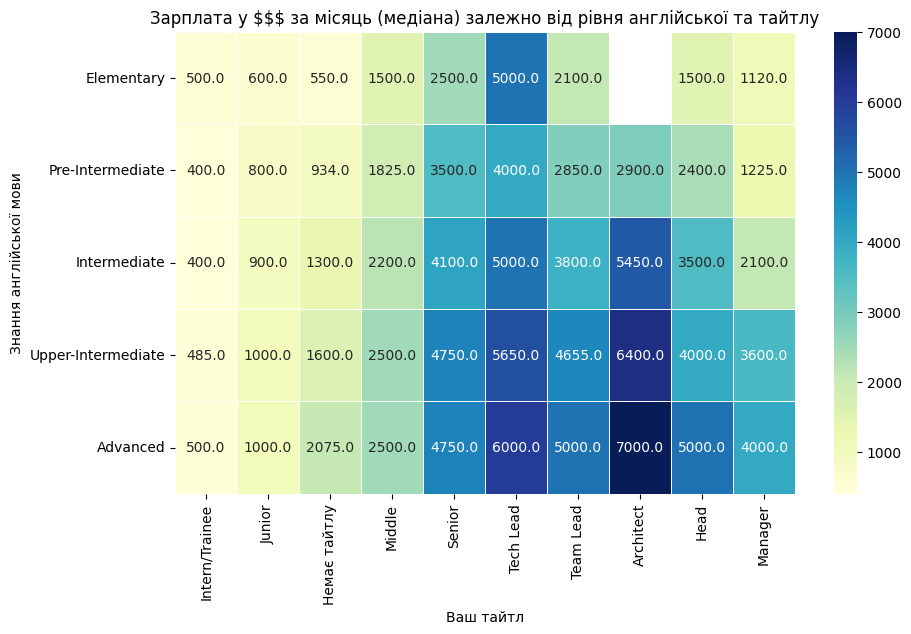

In [62]:
plt.figure(figsize=(10, 6))
sns.heatmap(english_salary_corr, annot=True, cmap="YlGnBu", fmt=".1f", linewidths=0.5)
plt.title("Зарплата у $$$ за місяць (медіана) залежно від рівня англійської та тайтлу")
plt.xlabel("Ваш тайтл")
plt.ylabel("Знання англійської мови")
plt.show()

Висновок: хочеш більше заробляти -вчи англійську. 

13. Виведіть результат методу describe() по колонці розміру ЗП для топ 5 за частотою зустрічання в даних областей (В якій області ви зараз живете?). Зробіть висновки, де вигідніше жити з точки зору ЗП і чи суттєва різниця на Ваш погляд для прийняття рішення про переїзд?

In [65]:
top5 = df['В якій області ви зараз живете?'].value_counts().head(10).index.tolist()

In [66]:
df_filtered = df.query('`В якій області ви зараз живете?` in @top5') # ось це прям топ!!! дізналась, що можна такі запити писати, і для цих пекельних колонок з пробілами обовʼязкові зворотні лапки
salary_description = df_filtered.groupby('В якій області ви зараз живете?')['Зарплата у $$$ за місяць, лише ставка після сплати податків'].describe().sort_values(by='count', ascending=False)
salary_description

,count,mean,std,min,25%,50%,75%,max
В якій області ви зараз живете?,,,,,,,,
Київ чи область,4411.0,3141.810209,2039.859712,80.0,1500.0,2800.0,4500.0,16000.0
Львів чи область,2353.0,3121.441751,2102.721295,150.0,1375.0,2700.0,4500.0,14000.0
Дніпро чи область,751.0,2582.584554,1864.711284,100.0,1025.0,2000.0,3600.0,12000.0
Івано-Франківськ чи область,478.0,2705.257322,1905.673385,200.0,1200.0,2372.5,3775.0,12436.0
Вінниця чи область,447.0,2888.306085,1902.668331,100.0,1300.0,2612.0,4100.0,11675.0
Одеса чи область,443.0,2516.826185,1664.201738,200.0,1200.0,2200.0,3500.0,12000.0
Харків чи область,355.0,2363.633803,1760.414833,50.0,1000.0,1800.0,3450.0,11000.0
Полтава чи область,252.0,2518.920635,1949.421132,100.0,1075.0,2000.0,3400.0,10900.0
Черкаси чи область,232.0,2651.034483,1849.484805,300.0,1087.5,2200.0,3887.5,8500.0


Висновок: якщо маєш своє житло, то треба дивитись на різницю у зарплаті, можливо, воно того не варте. та можна здавати власне і знімати деінде це трохи цікавіше. Однзначної відповіді немає. Окрім грошей існують інші фактори: сімʼя, друзі, власні адаптивні навички.. тощо 

In [27]:
df['Загальний стаж роботи за спеціальністю'].value_counts().reset_index()

,Загальний стаж роботи за спеціальністю,count
0,3 роки,1608
1,4 роки,1447
2,2 роки,1427
3,5 років,1351
4,"1,5 року",1056
5,6 років,982
6,1 рік,922
7,7 років,791
8,10 років,599
9,15 і більше років,586


14. Як зростає зарплата з роками? Для цього нам треба відформатувати колонку "Загальний стаж роботи за спеціальністю" аналогічно до того, як ми це робили для колонки 'Знання англійської мови' і потім вивести медіанні значення для кількості років стажу.

In [28]:
df['Загальний стаж роботи за спеціальністю'] = pd.Categorical(df['Загальний стаж роботи за спеціальністю'],
                      categories=['Менше як 3 місяці', '3 місяці', 'Пів року', '1 рік', '1,5 року','2 роки',
                                  '3 роки','4 роки', '5 років', '6 років', '7 років', '8 років',
                                  '9 років', '10 років', '11 років', '12 років', '13 років', '14 років', '15 і більше років'],
                      ordered=True)

In [49]:
year_salary_corr = df.groupby('Загальний стаж роботи за спеціальністю', observed=False)[['Зарплата у $$$ за місяць, лише ставка після сплати податків']].median().sort_values(by='Зарплата у $$$ за місяць, лише ставка після сплати податків').reset_index()

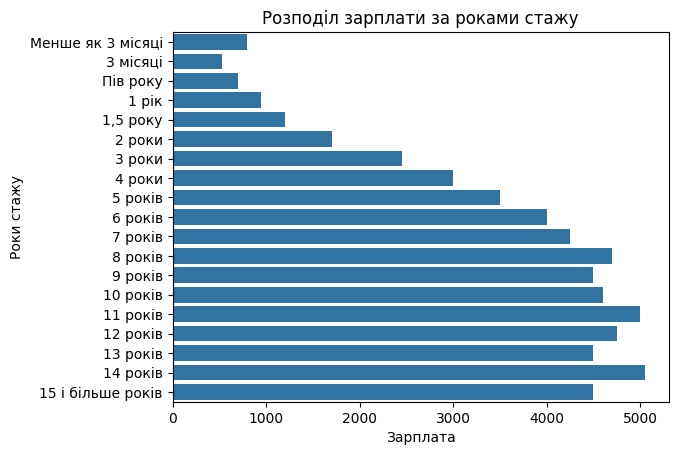

In [57]:
sns.barplot(x='Зарплата у $$$ за місяць, лише ставка після сплати податків', y='Загальний стаж роботи за спеціальністю', data=year_salary_corr)
plt.title('Розподіл зарплати за роками стажу')
plt.xlabel('Зарплата')
plt.ylabel('Роки стажу')
plt.show()

In [38]:
pd.pivot_table(df, columns='Загальний стаж роботи за спеціальністю', values='Зарплата у $$$ за місяць, лише ставка після сплати податків', aggfunc='median', observed=True)



Загальний стаж роботи за спеціальністю,Менше як 3 місяці,3 місяці,Пів року,1 рік,"1,5 року",2 роки,3 роки,4 роки,5 років,6 років,7 років,8 років,9 років,10 років,11 років,12 років,13 років,14 років,15 і більше років
"Зарплата у $$$ за місяць, лише ставка після сплати податків",800.0,525.0,700.0,950.0,1200.0,1700.0,2450.0,3000.0,3500.0,4000.0,4250.0,4700.0,4500.0,4600.0,5000.0,4750.0,4500.0,5050.0,4500.0


Однозначно виводити результати в таблиці геть не так інформативно як на графіку.